# imports, start

In [1]:
#%config Completer.use_jedi = False

In [2]:
import requests
import json
import pandas as pd
import os
import rasterio

In [3]:
raster_coords = pd.read_csv('data/bounding_boxes_coordinates')
raster_coords.set_index('index', inplace=True)

# Requests

In [4]:
def get_info_from_adress(params):
    """
    From an adress, get the coordinates and the polygon of the buildings
    """
    diccie = {}
    request = requests.get(
        "https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
        params=params).content
    jayson = json.loads(request)
    adress_obj = jayson['adresMatches'][0]['adresseerbareObjecten']

    diccie['adress_coords'] = jayson['adresMatches'][0]['adresPositie']['point']['coordinates']
    adress_objects = jayson['adresMatches'][0]['adresseerbareObjecten']
    polygons = []
    for obj in adress_objects:
        if obj['objectType'] == 'gebouweenheid':
            polygons.append(get_polygon_from_detail_url_gebouweenheid(obj['detail']))
    return polygons

In [5]:
def request_json_content(url: str, params: dict) -> dict:
    request = requests(url, params)
    content = request.content
    jayson = json.loads(content)
    return jayson

In [6]:
def get_polygon_from_detail_url_gebouweenheid(url):
    request = requests.get(url).content
    jayson = json.loads(request)
    request_poly = requests.get(jayson['gebouw']['detail']).content
    jayson_poly = json.loads(request_poly)
    poly = jayson_poly['geometriePolygoon']['polygon']['coordinates']
    return poly


In [8]:
params = {"postcode": 3550, "straatnaam": 'Schachtplein', "huisnummer": 1 }
polygons = get_info_from_adress(params)
polygons

[[[[217348.29496980458, 192642.6979917623],
   [217313.16799378395, 192646.79399176314],
   [217311.26079378277, 192630.43802375346],
   [217301.9423937723, 192631.49728775397],
   [217302.16703377664, 192633.47347975522],
   [217292.9413697645, 192634.52218375728],
   [217281.5679937601, 192635.81498375535],
   [217281.33202575892, 192633.4519757554],
   [217281.54098575562, 192633.431111753],
   [217281.3240257576, 192631.4289997518],
   [217281.5327937603, 192631.40640775487],
   [217279.51000975817, 192613.92698374018],
   [217279.26501775533, 192613.95533574],
   [217279.0339777544, 192611.9589837417],
   [217278.857081756, 192611.97946374118],
   [217278.58296975493, 192609.61101573706],
   [217299.16607376933, 192607.0733517371],
   [217299.39762577415, 192609.10995973647],
   [217359.24056981504, 192602.30739973485],
   [217359.0091458112, 192600.27079173177],
   [217371.91404182464, 192598.80397573113],
   [217371.17413782328, 192592.29479172453],
   [217384.17247383296, 19259

# getting the right file

## getting the file number

In [9]:
coords = polygons[0][0][0]

In [10]:
x, y = coords

In [11]:
for xx in raster_coords.columns:
    xx = [int(s) for s in xx.strip('()').split(', ')]
    if (x > float(xx[0])) & (x <= float(xx[1])):
        print(xx)

[194000, 226000]


In [12]:
def find_index(coord, index):
    for i in index:
        list_i = [int(s) for s in i.strip('()').split(', ')]
        if (coord > float(list_i[0])) & (coord <= float(list_i[1])):
            return i

In [13]:
ind = find_index(y, raster_coords.index)
col = find_index(x, raster_coords.columns)

In [14]:
k = str(raster_coords.loc[ind, col])

In [15]:
if len(k) < 2:
    k = '0' + k

In [16]:
k

'25'

## Creating or downloading the file

In [17]:
cwd = os.getcwd()

In [18]:
cwd

'C:\\Users\\simon\\PycharmProjects\\3D_houses'

In [19]:
data_dir = os.path.join(cwd, 'data')
data_dir

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data'

if not os.path.exists(k_dir):
    print('not')
    os.makedirs(k_dir)

In [20]:
import glob
for f in glob.glob("C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\tif_files\\*"):
    print(f)

C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVIIDSMRAS1m_k25.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVIIDSMRAS1m_k35.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVIIDSMRAS1m_k43.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVIIDTMRAS1m_k25.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVII_vdc_k25.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVII_vdc_k35.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\DHMVII_vdc_k43.zip
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\Gebruiksvoorwaarden_Digitaal_Hoogtemodel_Vlaanderen_II_DSM_raster_1_m.pdf
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\Gebruiksvoorwaarden_Digitaal_Hoogtemodel_Vlaanderen_II_DTM_raster_1_m.pdf
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\GeoTIFF
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\Leesmij_DHMVII.pdf
C:\Users\simon\PycharmProjects\3D_houses\data\tif_files\Meta

In [21]:
k

'25'

In [22]:
tif_folder = os.path.join(data_dir, 'tif_files\\GeoTIFF')
tif_folder

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\tif_files\\GeoTIFF'

In [23]:
k_tif_dsm = f'DHMVIIDSMRAS1m_k{k}.tif'
k_tif_dtm = f'DHMVIIDTMRAS1m_k{k}.tif'

In [24]:
k_DSM_tif_loc = os.path.join(tif_folder, k_tif_dsm)
k_DTM_tif_loc = os.path.join(tif_folder, k_tif_dtm)
#r'C:\Users\simon\PycharmProjects\3D_houses\data\1\DSM\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
#DSM_tif = rasterio.open(DSM_tif_loc)

# Masking

In [25]:
import fiona
import rasterio.mask
from shapely import geometry

In [26]:
polygons[0][0]

[[217348.29496980458, 192642.6979917623],
 [217313.16799378395, 192646.79399176314],
 [217311.26079378277, 192630.43802375346],
 [217301.9423937723, 192631.49728775397],
 [217302.16703377664, 192633.47347975522],
 [217292.9413697645, 192634.52218375728],
 [217281.5679937601, 192635.81498375535],
 [217281.33202575892, 192633.4519757554],
 [217281.54098575562, 192633.431111753],
 [217281.3240257576, 192631.4289997518],
 [217281.5327937603, 192631.40640775487],
 [217279.51000975817, 192613.92698374018],
 [217279.26501775533, 192613.95533574],
 [217279.0339777544, 192611.9589837417],
 [217278.857081756, 192611.97946374118],
 [217278.58296975493, 192609.61101573706],
 [217299.16607376933, 192607.0733517371],
 [217299.39762577415, 192609.10995973647],
 [217359.24056981504, 192602.30739973485],
 [217359.0091458112, 192600.27079173177],
 [217371.91404182464, 192598.80397573113],
 [217371.17413782328, 192592.29479172453],
 [217384.17247383296, 192590.81728772447],
 [217384.23173782974, 192591.3

In [ ]:
polies = []
for pol in polygons:
    polies.append(geometry.Polygon(polygons[0]))

In [27]:
poly = geometry.Polygon(polygons[0][0])

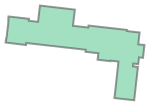

In [28]:
poly

In [29]:
polygons = polygons[0]

polygons = polygons['polygon']

In [30]:
polygons

[[[217348.29496980458, 192642.6979917623],
  [217313.16799378395, 192646.79399176314],
  [217311.26079378277, 192630.43802375346],
  [217301.9423937723, 192631.49728775397],
  [217302.16703377664, 192633.47347975522],
  [217292.9413697645, 192634.52218375728],
  [217281.5679937601, 192635.81498375535],
  [217281.33202575892, 192633.4519757554],
  [217281.54098575562, 192633.431111753],
  [217281.3240257576, 192631.4289997518],
  [217281.5327937603, 192631.40640775487],
  [217279.51000975817, 192613.92698374018],
  [217279.26501775533, 192613.95533574],
  [217279.0339777544, 192611.9589837417],
  [217278.857081756, 192611.97946374118],
  [217278.58296975493, 192609.61101573706],
  [217299.16607376933, 192607.0733517371],
  [217299.39762577415, 192609.10995973647],
  [217359.24056981504, 192602.30739973485],
  [217359.0091458112, 192600.27079173177],
  [217371.91404182464, 192598.80397573113],
  [217371.17413782328, 192592.29479172453],
  [217384.17247383296, 192590.81728772447],
  [2173

In [31]:
with rasterio.open(k_DSM_tif_loc) as src:
    out_image_dsm, out_transform = rasterio.mask.mask(src, [poly], crop=True, filled = True, pad = True)
    out_meta = src.meta

In [32]:
with rasterio.open(k_DTM_tif_loc) as src:
    out_image_dtm, out_transform = rasterio.mask.mask(src, [poly], crop=True, filled = True, pad = True)
    out_meta = src.meta

In [33]:
image_chm = out_image_dtm - out_image_dsm

In [34]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import plotly

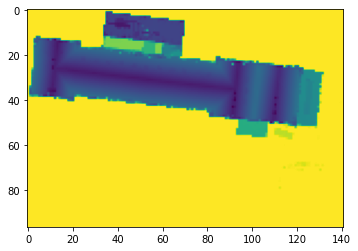

In [35]:
show(image_chm)
plt.show()

# plotly

In [36]:
import plotly.graph_objects as go

%matplotlib notebook

In [37]:
%matplotlib notebook

In [38]:
plotly.offline.init_notebook_mode (connected = True)

plotly.offline.init_notebook_mode (connected = True)

In [39]:
import numpy as np

In [40]:
image_chm = image_chm[0]*-1

In [41]:
fig = go.Figure(data = [go.Surface(z=np.flip(image_chm, axis=1))])
fig.update_layout(title='Mt Bruno Elevation', autosize=True)
fig.show()

In [ ]:
z_data.values

In [ ]:
z2 = image_chm[0]
z1 = z_data.values

In [ ]:
z_data.values.shape

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# 3d mesh

In [ ]:
import numpy as np

In [ ]:
image_chm.shape

In [ ]:
x = np.arange(0, image_chm.shape[1])
y = np.arange(0, image_chm.shape[2])

In [ ]:
xx, yy = np.meshgrid(x, y)

In [ ]:
fig = go.Figure(data=[go.Mesh3d(x=xx, y=yy, z=image_chm, color='lightpink', opacity=0.50)])
fig.show()

In [ ]:
go

In [ ]:
DSM_tif.read()

In [ ]:
show(DSM_tif)

#### Dowload link example

In [ ]:
https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k25.zip

In [ ]:
k_folder

In [ ]:
os.path.exists(k_folder)